In [93]:
# Compare Algorithms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
#from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn import metrics
from pandas_ml import ConfusionMatrix
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV

In [103]:
mydata=pd.read_csv(r"C:\Users\VIREN\Downloads\BMI555IEE520Fall2018train.csv",header=0)
mydata_test =pd.read_csv(r"C:\Users\VIREN\Downloads\BMI555IEE520Fall2018Test.csv")

categorical_cols=mydata.select_dtypes(include=['object']).columns
# print(categorical_cols)
cat =[4,12,63,64]
# Importing testing data set
train=mydata.iloc[:,:].values

train=np.delete(train,2500,axis=0)

train_X = train[:,1:67]
Y = train[:,67].astype(int)
# Y =pd.DataFrame(Y)

In [104]:
test = mydata_test.iloc[:,:].values
test_X = test[:,1:67]
test_Y = test[:,67]
test_X = pd.DataFrame(test_X)

test_Xd = pd.get_dummies(test_X,columns=cat,dtype=float) #Create Dummies from Categorical variables for Test Dataset

train_Xd = pd.DataFrame(train_X)
X = pd.get_dummies(train_Xd,columns=cat,dtype=float) #Create Dummies from Categorical variables for Train Dataset
X = np.asarray(X,dtype=int)

# test_Xd.head()
# X.dtypes
# New_Sampled_Data = pd.concat([X,Y],axis=1)
# New_Sampled_Data.head()

Class 0: 1891
Class 1: 609
Proportion: 3.11 : 1


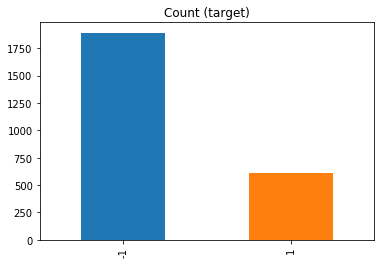

In [105]:
target_count = New_Sampled_Data.iloc[:,78].value_counts()
class_0, class_1 = New_Sampled_Data.iloc[:,78].value_counts()

print('Class 0:', target_count[-1])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[-1] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)')

# # Divide by class
Y_class_0 = New_Sampled_Data[New_Sampled_Data.iloc[:,78] == -1]
Y_class_1 = New_Sampled_Data[New_Sampled_Data.iloc[:,78] == 1]

In [159]:
# split data into train and test sets
seed = 7
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state= seed)
# X_train = pd.DataFrame(X_train)
# X_test = pd.DataFrame(X_test)
# y_test = pd.DataFrame(y_test)
# y_train = pd.DataFrame(y_train)

# y_train=np.asarray(y_train)
# y_test=np.asarray(y_test)
# y_train.reshape(-1,1)
# print(type(y_train))
# print(y_train.ndim)
# y_train= y_train.ravel()
# y_test = y_test.ravel()
# pd.(y_train)

# fit model on training data
model = XGBClassifier(max_depth=3,learning_rate=0.1,n_estimators=28,subsample=0.4,random_state=seed)
# model.fit(X_train, y_train)

eval_set = [(X_test, y_test)]
model.fit(X_train, y_train,eval_set=eval_set,eval_metric= "error",verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-error:0.181333
[1]	validation_0-error:0.169333
[2]	validation_0-error:0.161333
[3]	validation_0-error:0.161333
[4]	validation_0-error:0.165333
[5]	validation_0-error:0.165333
[6]	validation_0-error:0.16
[7]	validation_0-error:0.162667
[8]	validation_0-error:0.161333
[9]	validation_0-error:0.157333
[10]	validation_0-error:0.16
[11]	validation_0-error:0.162667
[12]	validation_0-error:0.161333
[13]	validation_0-error:0.157333
[14]	validation_0-error:0.162667
[15]	validation_0-error:0.161333
[16]	validation_0-error:0.16
[17]	validation_0-error:0.16
[18]	validation_0-error:0.161333
[19]	validation_0-error:0.164
[20]	validation_0-error:0.162667
[21]	validation_0-error:0.158667
[22]	validation_0-error:0.162667
[23]	validation_0-error:0.158667
[24]	validation_0-error:0.16
[25]	validation_0-error:0.154667
[26]	validation_0-error:0.157333
[27]	validation_0-error:0.152
Accuracy: 84.80%


C:\Users\VIREN\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [144]:

#seed=719
seed=3421
actuals=[]
probs=[]
hats=[]
scaler = StandardScaler()
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=seed)

for train, test in kfold.split(X, Y):
#     print('train: %s, test: %s' % (train, test))
    # Train classifier on training data, predict test data
      scaler.fit(X[train]) #learn scaling parameters on training data
      Xtrain2 = scaler.transform(X[train])
      Xtest2 = scaler.transform(X[test]) #Apply transform to test data
      model.fit(Xtrain2, Y[train])
      foldhats = model.predict(Xtest2)
      foldprobs = model.predict_proba(Xtest2)[:,1] # Class probability estimates for ROC curve
      actuals = np.append(actuals, Y[test]) #Combine targets, then probs, and then predictions from each fold
      probs = np.append(probs, foldprobs)
      hats = np.append(hats, foldhats)

print ("Crossvalidation Error")    
print ("CVerror = ", metrics.accuracy_score(actuals,hats))
print (metrics.classification_report(actuals, hats))
cm = metrics.confusion_matrix(actuals,hats)
print (cm)
# cm.print_stats()

C:\Users\VIREN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\VIREN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\VIREN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\VIREN\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\VIREN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: Da

Crossvalidation Error
CVerror =  0.8392
             precision    recall  f1-score   support

       -1.0       0.87      0.92      0.90      1891
        1.0       0.71      0.57      0.64       609

avg / total       0.83      0.84      0.83      2500

[[1748  143]
 [ 259  350]]


C:\Users\VIREN\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


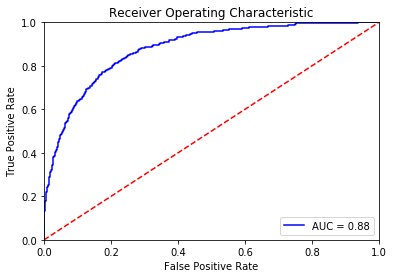

In [145]:
# if len(mydata) == 2: #ROC curve code here only for 2 classes
fpr, tpr, threshold = metrics.roc_curve(actuals, probs)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [161]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [1000], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}


clf = GridSearchCV(model, parameters, n_jobs=5, 
                   cv=StratifiedKFold(y_train, n_folds=5, shuffle=True), scoring='roc_auc',verbose=2, refit=True)

clf.fit(X_train, y_train)

#trust your CV!
best_parameters, score, _ = max(clf.grid_scores_, key=lambda x: x[1])
print('Raw AUC score:', score)
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

test_probs = clf.predict_proba(X_test)[:,1]

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   14.9s remaining:   22.4s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   17.3s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   17.3s finished


Raw AUC score: 0.8601284908876361
colsample_bytree: 0.7
learning_rate: 0.05
max_depth: 6
min_child_weight: 11
missing: -999
n_estimators: 1000
nthread: 4
objective: 'binary:logistic'
seed: 1337
silent: 1
subsample: 0.8


In [162]:
test_probs

array([1.32724512e-02, 1.59847260e-01, 3.34547088e-02, 4.51314962e-04,
       7.02171773e-02, 3.48619372e-01, 9.15479958e-02, 9.55947459e-01,
       9.97920930e-01, 1.37537092e-01, 1.91657007e-01, 1.89725962e-03,
       4.56469715e-01, 1.97126549e-02, 1.00594051e-01, 1.08057708e-02,
       1.74020007e-01, 8.32652390e-01, 2.85894666e-02, 4.95497510e-03,
       3.36146448e-03, 3.99437137e-02, 1.47709176e-02, 1.68512657e-01,
       1.84413582e-01, 1.56862487e-03, 1.37672795e-03, 3.79419401e-02,
       8.63000192e-03, 6.60789549e-01, 1.25375614e-01, 3.58382553e-01,
       5.77188730e-01, 2.64832944e-01, 8.94319534e-01, 7.90526569e-01,
       7.70368008e-03, 6.94011807e-01, 2.44212383e-03, 3.86837274e-02,
       4.80027437e-01, 2.32919399e-02, 5.96044004e-01, 1.38771161e-03,
       6.37488291e-02, 4.29766886e-02, 4.06863214e-03, 4.56981966e-03,
       4.02706349e-03, 8.81254580e-03, 4.35966328e-02, 1.33270279e-01,
       1.37308408e-02, 6.26464933e-03, 8.91970813e-01, 7.30433583e-01,
      